<a href="https://colab.research.google.com/github/4hmetcakmak/PythonDataScienceHandbook/blob/master/CEV_VBE_Ch_4_ExercisesTasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
#https://colab.research.google.com/drive/1WBLs7Hq3k4TgJV1Ym_CglYVI6ZKiReDx#scrollTo=GGyDovL2QDLa buna bakabilirsin 

TASK-A: Please download the dataset and upload it to Colab environment. Then check the dataset (head and tail) after reading the dataset. 

In [ ]:
mall=pd.read_csv("/content/Mall_Customers (4).csv")
mall.head()
mall.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


TASK-B: Please check the descriptive statistics of this dataset by the use of describe function.

In [ ]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


TASK-C: Please provide a control for the missing values and report your findings very briefly.

In [ ]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

TASK-D: Please check and clean the dataset regarding the potential outliers by the use of IQR method and report your findings accordingly. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


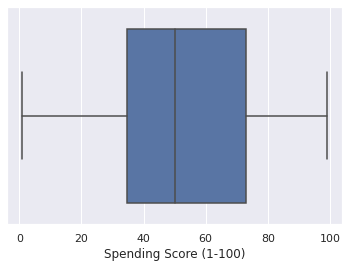

In [ ]:
sns.boxplot(mall["Spending Score (1-100)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


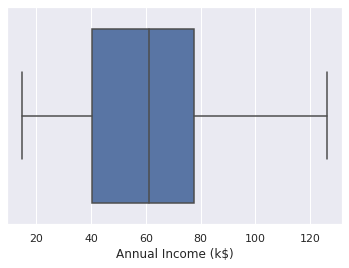

In [ ]:
sns.boxplot(df["Annual Income (k$)"])

In [ ]:
q1=mall.quantile(0.25)
q3=mall.quantile(0.75)
IQR= q3-q1
IQR
df = mall[~((mall < (q1 - 1.5 * IQR)) |(mall > (q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


TASK-E: Please provide a correlation analysis for the columns and demonstrate it via heatmap.

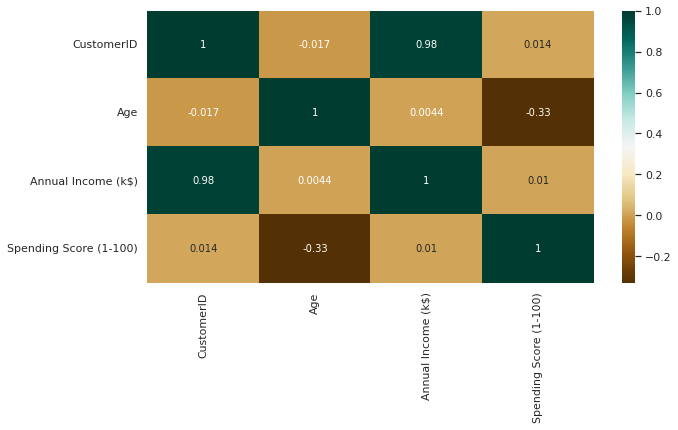

In [ ]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c, cmap="BrBG",annot=True)

TASK-F: Please provide histrograms for each of the columns and briefly write down your observations. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4d50cb210>,
      dtype=object)

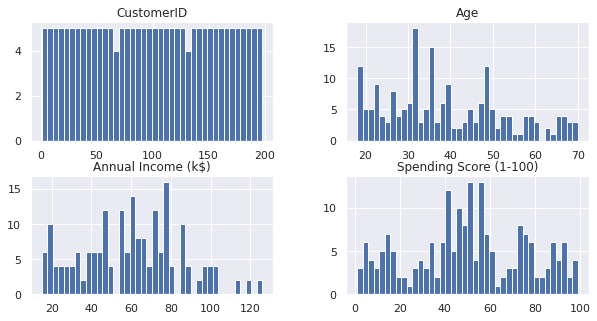

In [ ]:
df.hist(bins=40, figsize=(10, 5))

TASK-G: Please provide a pairplot from the Seaborn library for understanding the relationship between columns.

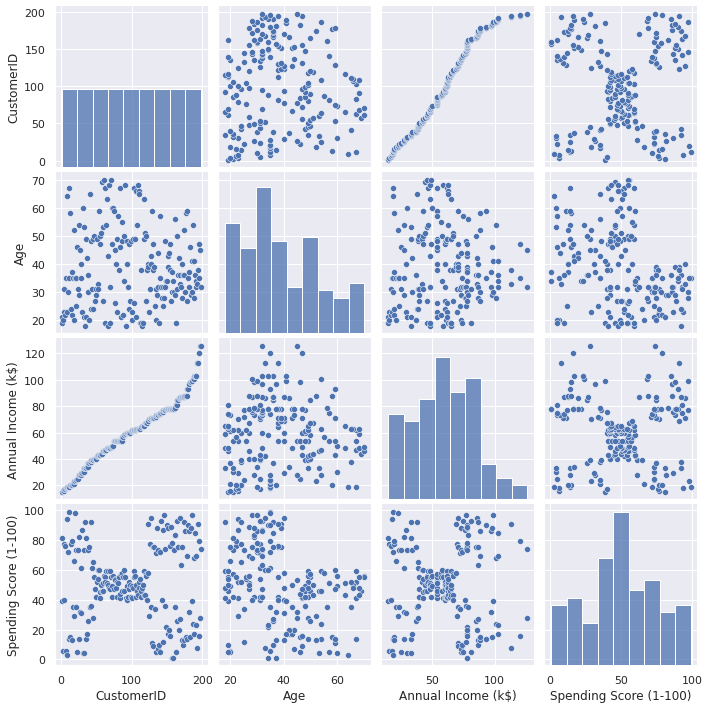

In [ ]:
sns.pairplot(df);

TASK-H: Please provide a comprehensive analysis by the use of a scatter plot with getting the possible contributions from color and size parameters.

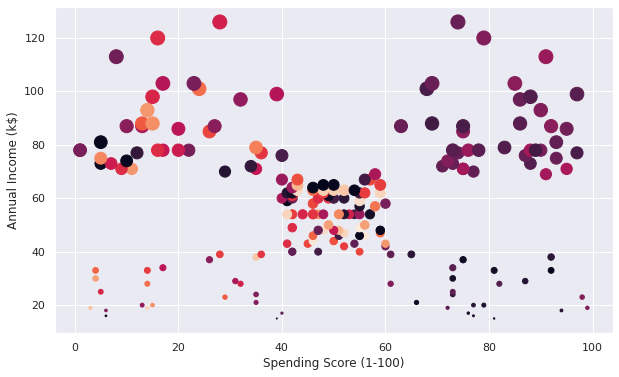

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=df["Age"], s=df["CustomerID"])
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
plt.show()

TASK-I: Please provide a pivot table for the following analyses:
- Gender based analysis (Female or Male)
- Age based analysis (Quartiles: 4 groups)
- Annual income (higher/lower than median)
- Spending score (higher/lower than median)
Your table should include the counts of these mall customers regarding the distributions given above.


In [ ]:
df.pivot_table("Annual Income (k$)", index="Gender", columns="Age")

Age,18,19,20,21,22,23,24,25,26,27,...,59,60,63,64,65,66,67,68,69,70
Gender,,,,,,,,,,,,,,,,,,,,,
Female,65.000000,64.000000,26.500000,44.75,37.0,41.5,29.5,72.0,NaN,56.0,...,NaN,50.0,65.0,NaN,38.0,63.0,47.0,53.5,NaN,NaN
Male,46.666667,54.666667,51.666667,15.00,20.0,NaN,49.0,50.5,58.0,77.5,...,65.25,30.0,48.0,19.0,63.0,63.0,45.0,63.0,44.0,47.5


In [ ]:
age = pd.qcut(df['Age'], 4)
df.pivot_table('Spending Score (1-100)',index=["Gender",age], aggfunc= "count" )

Spending Score (1-100)
Gender Age                                    
Female (17.999, 28.25]                      25
       (28.25, 36.0]                        36
       (36.0, 49.0]                         29
       (49.0, 70.0]                         22
Male   (17.999, 28.25]                      25
       (28.25, 36.0]                        16
       (36.0, 49.0]                         22
       (49.0, 70.0]                         23

In [ ]:
annual=pd.qcut(df["Annual Income (k$)"],2 )
spending=pd.qcut(df["Spending Score (1-100)"], 2)
df.pivot_table('Spending Score (1-100)',index=["Gender",age], columns= [annual, spending], aggfunc= "count" )

Annual Income (k$)     (14.999, 61.0]              (61.0, 126.0]             
Spending Score (1-100)  (0.999, 50.0] (50.0, 99.0] (0.999, 50.0] (50.0, 99.0]
Gender Age                                                                   
Female (17.999, 28.25]              3           13             7            2
       (28.25, 36.0]                8            7             3           18
       (36.0, 49.0]                12            2            11            4
       (49.0, 70.0]                 8            6             7            1
Male   (17.999, 28.25]              3           11             5            6
       (28.25, 36.0]                1            4             3            8
       (36.0, 49.0]                 7            1             8            6
       (49.0, 70.0]                 9            5             7            2

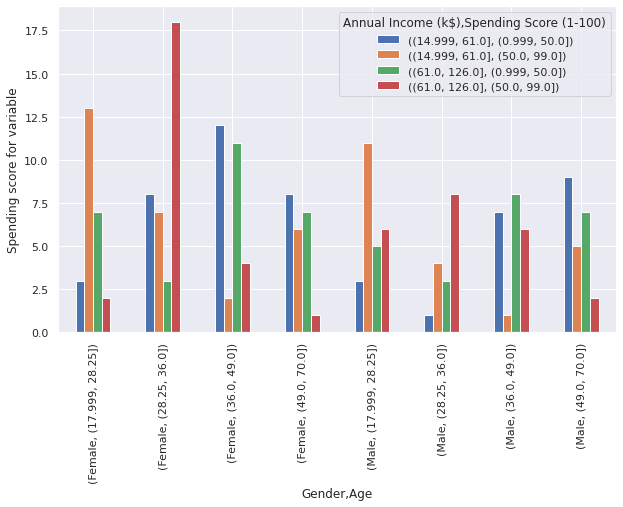

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
df.pivot_table('Spending Score (1-100)',index=["Gender",age], columns= [annual, spending], aggfunc= "count" ).plot(kind="bar", figsize=(10,6))
plt.ylabel("Spending score for variable")